# Heart Disease Predictive Model - Capstone Project 1
---



### Problem Statement:

Heart disease remains one of the leading causes of mortality worldwide, posing a significant burden on healthcare systems and affecting millions of lives. Early detection and accurate prediction of heart disease are critical for improving patient outcomes through timely intervention and preventive measures.


---

### Role and Objective:

As a junior data analyst, The objective of this project is to design and implement a robust machine learning model that accurately predicts the likelihood of heart disease in individuals. By analyzing a comprehensive dataset that includes clinical, demographic, and lifestyle factors, the model aims to identify key predictors and provide actionable insights.


In this machine capstone, I have collected the dataset from kaggle (https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset) and I will be using a number of machine learning algorithims to find which prediction model works best in prediciting whether a person is suffering from heart disease or not.

---

### Potential Applications:

1. Early Detection & Prevention
2. Risk Assessment & Stratification
3. Treatment Optimization
4. Resource Allocation
5. Research & Clinical Trials

---

### Dataset source and features:

The dataset comprises a total of 70000 patients with age ranging from 30 to 65 years old.

Before data cleaning, the dataset 34979 records of patients with heart disease and 
35021 records of patients without heart disease.  
The "disease" column serves as a class label to categorize patients 
into two groups: those with or without heart disease.

In the original dataset presented here there are 24470 male patients, 
and 45530 female patients. The features are as follows,

	1. [id] - The unique ID of the patient
	2. [age] - The age of the patient (days)
	3. [gender] - The gender of the patient
	4. [height] - Height in cm
	5. [weight] - weight in kg
	6. [ap_hi] - systolic blood pressure
	7. [ap_lo] - diastolic blood pressure
	8. [cholesterol] - cholesterol level 1:Normal, 2: Above Normal, 3: Well Above Normal
	9. [gluc] - glucose level of patient. 1:Normal, 2: Above Normal, 3: Well Above Normal
	10.[smoke] - whether patient smokes or not
	11.[alco] - whether patient drinks or not
	12.[active] = whether patient exercises or not
	13.[disease] - Presence of disease (TARGET VARIABLE)
     
---

### Import Libraries

Starting off with the project I'll be importing the neccessary libraries. I'll be using `numpy` and `pandas` to start our analysis. For visualization, I'll use `pyplot` subpackage of `matplotlib`. I'll also be using `seaborn` for data visualization as well. 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


To split the available dataset for testing and training, I'll be using the `train_test_split` method. To scale the features, I am using `StandardScaler`.

For implementing Machine Learning models and processing of data, I will use the `sklearn` and its metrics library for analysis and evaluation.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

import warnings
warnings.filterwarnings('ignore')

For the machine learning algorithms I will be using

1. Random Forest
2. K Nearest Neighbours
3. Logistic Regression


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Import Dataset

After importing the neccessary libraries we will now be looking into the dataset. I'll use the pandas `read_csv` method to read the dataset.

In [5]:
dataset = pd.read_csv('cardio_data.csv')

I'll now be taking a closer look into the dataset and its features, with this I'll be using `describe()` and `info()` before processing and visualization. Also we can have a glimpse of the data set with `sample(10)` taking 10 random rows from the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unna

In [7]:
dataset.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,0.0,0.0,0.0,0.0,0.0
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700,NaN,NaN,NaN,NaN,NaN
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000,NaN,NaN,NaN,NaN,NaN
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.sample(10)

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,...,height,occupation,smoke,weight,disease,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
57122,20/11/2020,India,81540,1,19591,0,153,90,1,1,...,170,Lawyer,0,97.0,0,NaN,NaN,NaN,NaN,NaN
46490,17/6/2020,Malaysia,66389,0,19701,0,120,90,1,1,...,171,Engineer,0,85.0,0,NaN,NaN,NaN,NaN,NaN
52211,8/10/2019,Malaysia,74468,1,21699,0,130,80,1,1,...,149,Nurse,0,59.0,1,NaN,NaN,NaN,NaN,NaN
18365,1/7/2021,Indonesia,26219,1,19947,0,140,100,2,1,...,150,Chef,0,87.0,1,NaN,NaN,NaN,NaN,NaN
31609,24/6/2019,Indonesia,45129,1,17737,0,110,80,1,1,...,165,Engineer,0,68.0,0,NaN,NaN,NaN,NaN,NaN
49729,8/9/2020,India,71003,1,15942,0,100,80,1,1,...,168,Nurse,0,69.0,0,NaN,NaN,NaN,NaN,NaN
43590,13/5/2022,Indonesia,62273,1,21100,0,160,90,1,1,...,158,Engineer,0,90.0,1,NaN,NaN,NaN,NaN,NaN
46685,16/2/2019,Malaysia,66653,1,23253,0,80,60,1,2,...,165,Others,1,54.0,0,NaN,NaN,NaN,NaN,NaN
3076,27/7/2022,Indonesia,4333,1,21183,0,120,80,1,1,...,160,Doctor,0,55.0,0,NaN,NaN,NaN,NaN,NaN
28308,13/3/2019,Malaysia,40461,1,21033,1,145,95,1,2,...,180,Teacher,1,94.0,1,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

Now I'll be cleaning up the dataset. I'll be attempting to remove any duplicates or empty cell data rows or columns. 

In [9]:
# finding empty data
print(dataset.isnull().sum())
#  5 unnamed columns with empty rows found, hence we'll need to remove them

date               0
country            0
id                 0
active             0
age                0
alco               0
ap_hi              0
ap_lo              0
cholesterol        0
gender             0
gluc               0
height             0
occupation         0
smoke              0
weight             0
disease            0
Unnamed: 16    70000
Unnamed: 17    70000
Unnamed: 18    70000
Unnamed: 19    70000
Unnamed: 20    70000
dtype: int64


In [10]:
# Impute or drop missing values
dataset = dataset.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1)

Standardizing date column to a consistent format

In [11]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%d/%m/%Y')

Convert Age (days) to Age (years)

In [12]:
dataset['age'] = dataset['age'] / 365.25
dataset['age'] = dataset['age'].round()

Feature engineering a BMI column

In [13]:
dataset['BMI'] = dataset['weight'] / (dataset['height'] / 100) ** 2
dataset['BMI'] = dataset['BMI'].round()

Identifying outliers through visualization

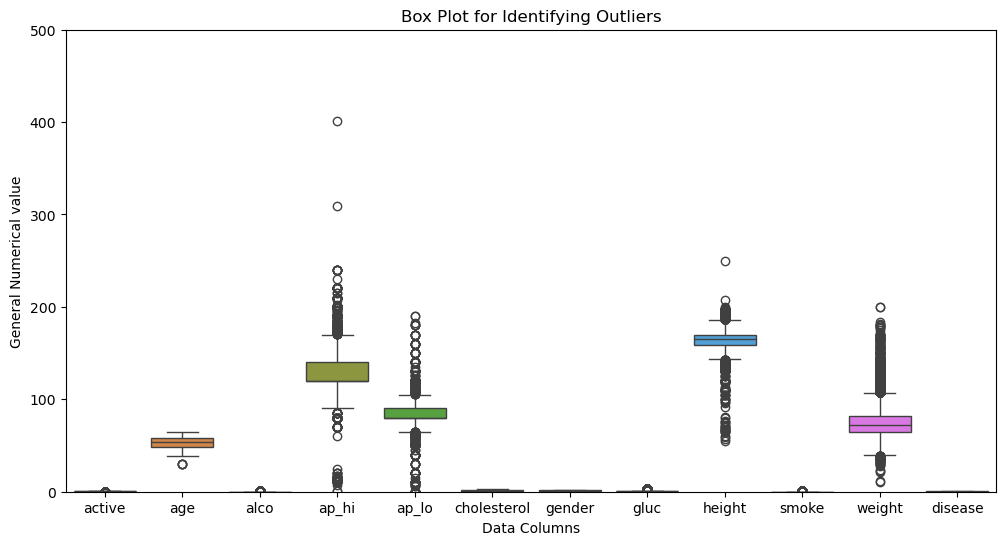

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset.drop(columns=['id', 'BMI']))
plt.title('Box Plot for Identifying Outliers')
plt.ylim(0, 500)  # Set the y-axis limits according to your desired range
plt.ylabel('General Numerical value')
plt.xlabel('Data Columns')
plt.show()

Removing outliers for 'ap_hi', 'ap_lo' , 'weight' and 'height'

In [15]:
selected_columns = dataset[['height', 'weight', 'ap_lo', 'ap_hi']]
selected_columns.describe()

,height,weight,ap_lo,ap_hi
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,164.359229,74.205690,96.630414,128.817286
std,8.210126,14.395757,188.472530,154.011419
min,55.000000,10.000000,-70.000000,-150.000000
25%,159.000000,65.000000,80.000000,120.000000
50%,165.000000,72.000000,80.000000,120.000000
75%,170.000000,82.000000,90.000000,140.000000
max,250.000000,200.000000,11000.000000,16020.000000


Counts before any outlier removal:
date           70000
country        70000
id             70000
active         70000
age            70000
alco           70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gender         70000
gluc           70000
height         70000
occupation     70000
smoke          70000
weight         70000
disease        70000
BMI            70000
dtype: int64

Counts after removing outliers for 'ap_hi' and 'ap_lo':
date           64502
country        64502
id             64502
active         64502
age            64502
alco           64502
ap_hi          64502
ap_lo          64502
cholesterol    64502
gender         64502
gluc           64502
height         64502
occupation     64502
smoke          64502
weight         64502
disease        64502
BMI            64502
dtype: int64

Counts after removing outliers for 'weight':
date           62922
country        62922
id             62922
active         62922
age            62922
alco           62

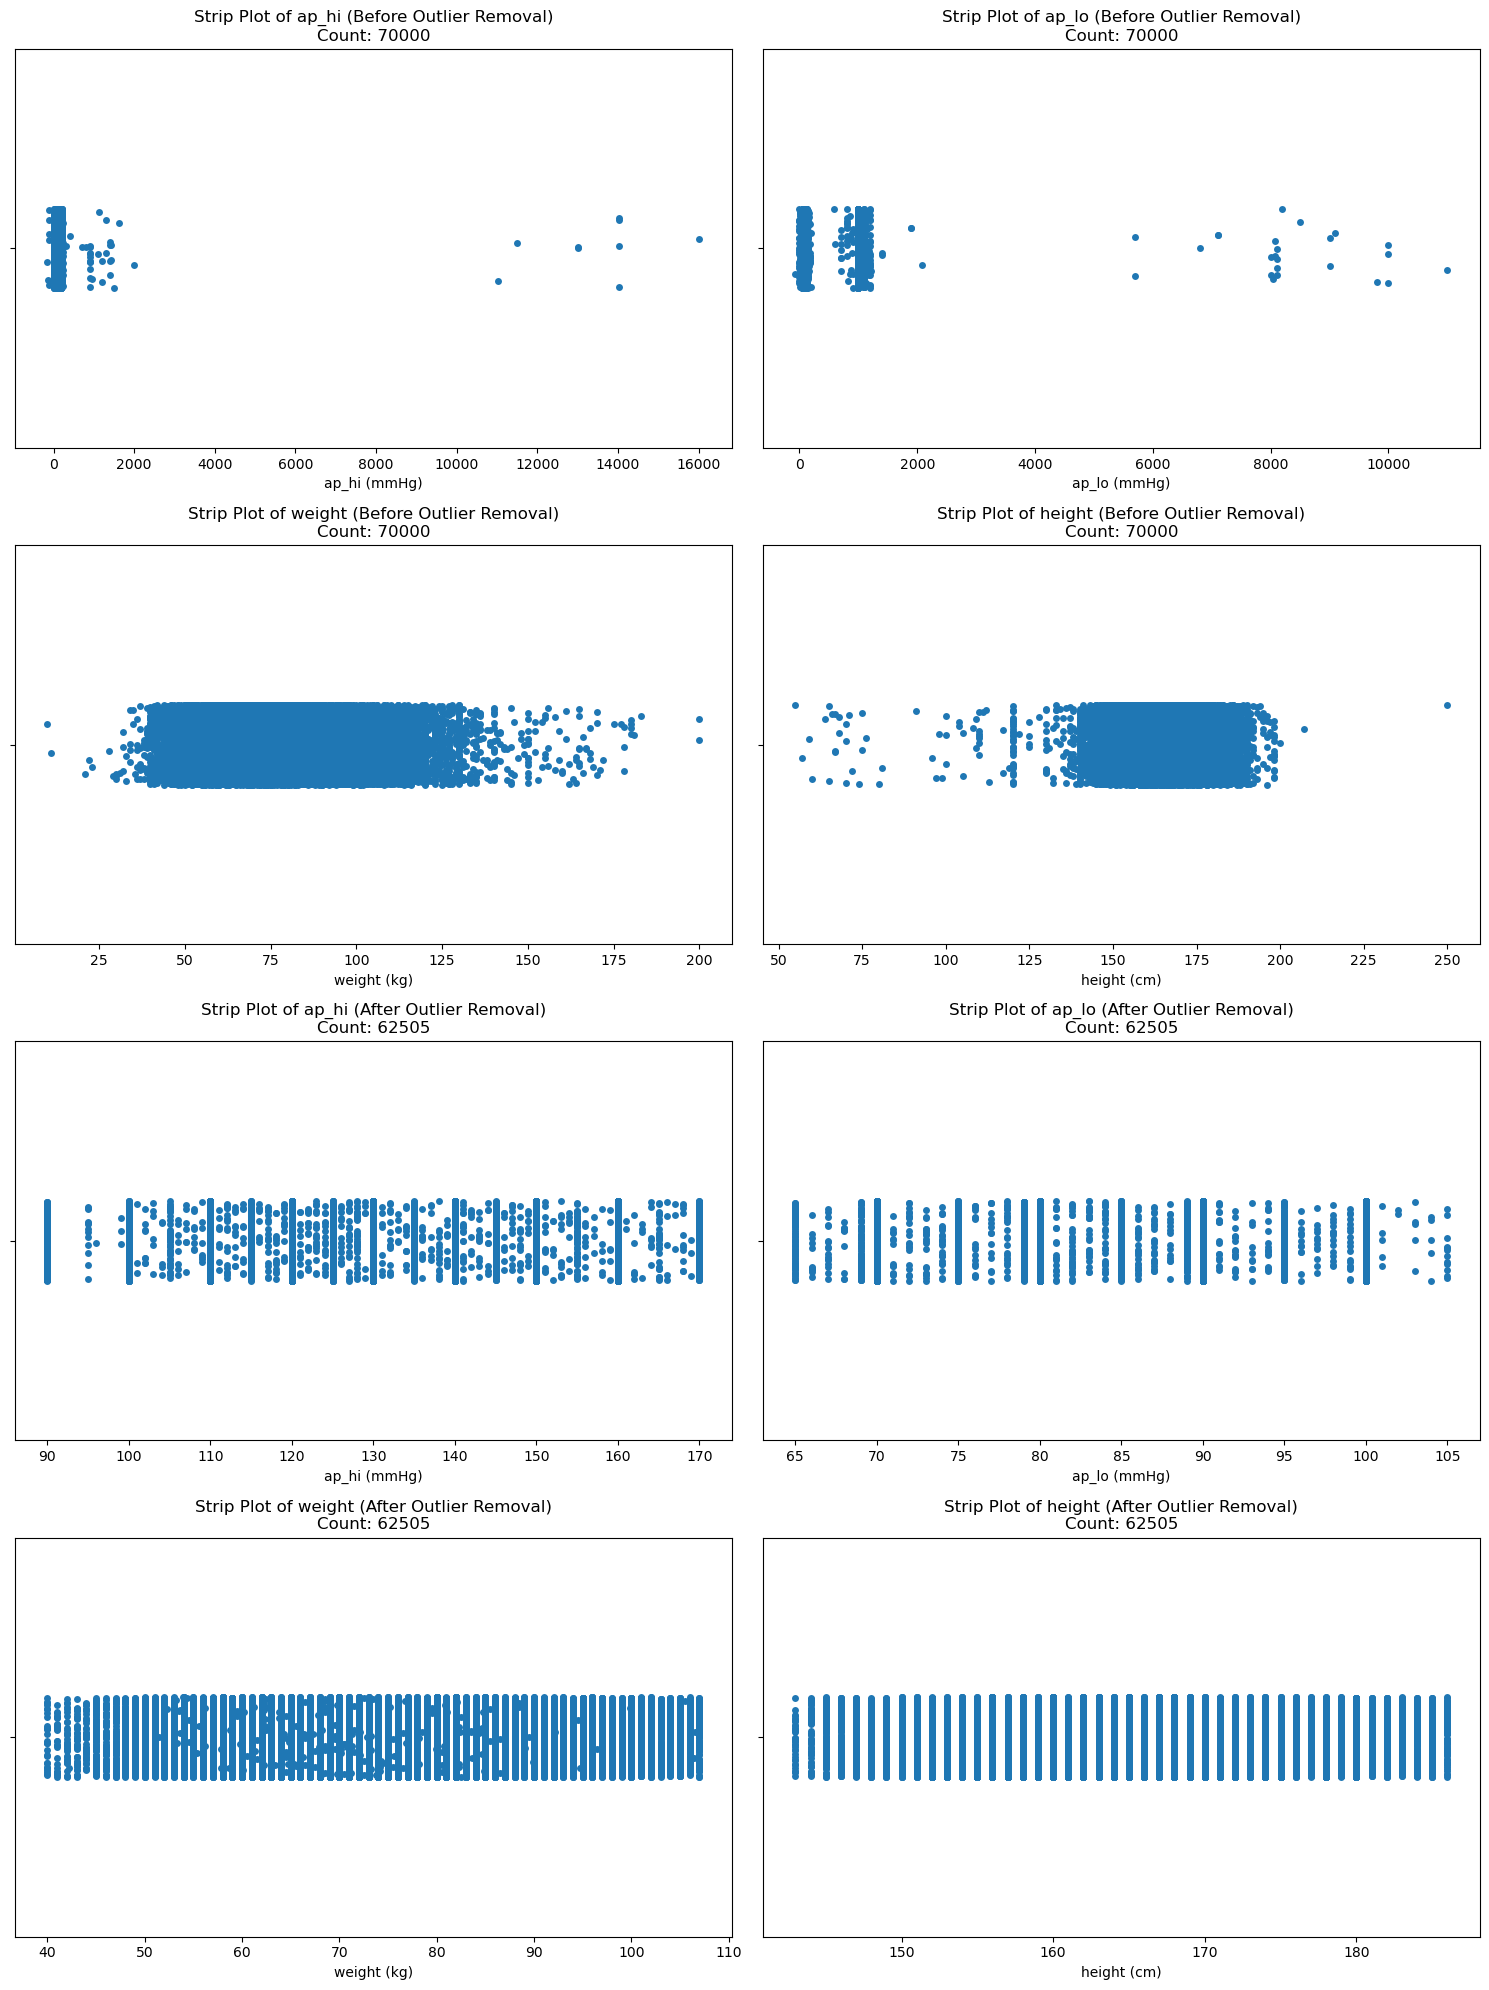

In [16]:
# Function to calculate bounds and filter outliers
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a copy of the original dataset for comparison
original_dataset = dataset.copy()

# Print counts before any outlier removal
print("Counts before any outlier removal:")
print(original_dataset.count())

# Remove outliers for 'ap_hi' and 'ap_lo'
dataset_filtered_ap_hi = filter_outliers(dataset, 'ap_hi')
dataset_filtered_ap_lo = filter_outliers(dataset_filtered_ap_hi, 'ap_lo')

# Print counts after removing outliers for 'ap_hi' and 'ap_lo'
print("\nCounts after removing outliers for 'ap_hi' and 'ap_lo':")
print(dataset_filtered_ap_lo.count())

# Remove outliers for 'weight'
dataset_filtered_weight = filter_outliers(dataset_filtered_ap_lo, 'weight')

# Print counts after removing outliers for 'weight'
print("\nCounts after removing outliers for 'weight':")
print(dataset_filtered_weight.count())

# Remove outliers for 'height'
dataset_filtered_height = filter_outliers(dataset_filtered_weight, 'height')

# Print counts after removing outliers for 'height'
print("\nCounts after removing outliers for 'height':")
print(dataset_filtered_height.count())

# List of columns to plot
columns_to_plot = {
    'ap_hi': 'mmHg',
    'ap_lo': 'mmHg',
    'weight': 'kg',
    'height': 'cm'
}

# Create subplots for before and after outlier removal
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a subplot before outlier removal
for i, (column, unit) in enumerate(columns_to_plot.items()):
    sns.stripplot(x=original_dataset[column], ax=axes[i])
    axes[i].set_title(f'Strip Plot of {column} (Before Outlier Removal)\nCount: {original_dataset[column].count()}')
    axes[i].set_xlabel(f'{column} ({unit})')

# Plot each column in a subplot after outlier removal
for i, (column, unit) in enumerate(columns_to_plot.items()):
    sns.stripplot(x=dataset_filtered_height[column], ax=axes[i + 4])
    axes[i + 4].set_title(f'Strip Plot of {column} (After Outlier Removal)\nCount: {dataset_filtered_height[column].count()}')
    axes[i + 4].set_xlabel(f'{column} ({unit})')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
df=dataset_filtered_height
df.describe()

,date,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease,BMI
count,62505,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000
mean,2020-07-02 05:20:42.850972160,49941.600336,0.804320,53.370594,0.052172,126.419870,81.698904,1.357699,1.348564,1.220638,164.406144,0.086345,73.180776,0.493880,27.112391
min,2018-01-01 00:00:00,0.000000,0.000000,30.000000,0.000000,90.000000,65.000000,1.000000,1.000000,1.000000,143.000000,0.000000,40.000000,0.000000,14.000000
25%,2019-04-05 00:00:00,24876.000000,1.000000,49.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000,24.000000
50%,2020-07-01 00:00:00,49980.000000,1.000000,54.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000,26.000000
75%,2021-10-02 00:00:00,74849.000000,1.000000,58.000000,0.000000,140.000000,90.000000,1.000000,2.000000,1.000000,170.000000,0.000000,81.000000,1.000000,30.000000
max,2023-01-01 00:00:00,99999.000000,1.000000,65.000000,1.000000,170.000000,105.000000,3.000000,2.000000,3.000000,186.000000,1.000000,107.000000,1.000000,51.000000
std,NaN,28864.503664,0.396727,6.737069,0.222375,14.289834,7.673364,0.675192,0.476519,0.567590,7.531365,0.280875,12.272097,0.499967,4.573349


Dropping columns that would not be using in the machine learning algorithm

In [18]:
df = df.drop(['date', 'country', 'occupation'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62505 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62505 non-null  int64  
 1   active       62505 non-null  int64  
 2   age          62505 non-null  float64
 3   alco         62505 non-null  int64  
 4   ap_hi        62505 non-null  int64  
 5   ap_lo        62505 non-null  int64  
 6   cholesterol  62505 non-null  int64  
 7   gender       62505 non-null  int64  
 8   gluc         62505 non-null  int64  
 9   height       62505 non-null  int64  
 10  smoke        62505 non-null  int64  
 11  weight       62505 non-null  float64
 12  disease      62505 non-null  int64  
 13  BMI          62505 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 7.2 MB


Preview of dataset values

In [19]:
print(df)

          id  active   age  alco  ap_hi  ap_lo  cholesterol  gender  gluc  \
0          0       1  50.0     0    110     80            1       2     1   
1          1       1  55.0     0    140     90            3       1     1   
2          2       0  52.0     0    130     70            3       1     1   
3          3       1  48.0     0    150    100            1       2     1   
5          8       0  60.0     0    120     80            2       1     2   
...      ...     ...   ...   ...    ...    ...          ...     ...   ...   
69993  99991       1  54.0     0    130     90            1       1     1   
69994  99992       1  58.0     0    150     80            1       1     1   
69995  99993       1  53.0     0    120     80            1       2     1   
69998  99998       0  61.0     0    135     80            1       1     2   
69999  99999       1  56.0     0    120     80            2       1     1   

       height  smoke  weight  disease   BMI  
0         168      0    62.0 

### Identifying our Target

In this dataset our 'target' is identified in binary '1' and '0', presence of heart disease and no presence of heart disease respectively. To assess if the target is evenly distributed so as to have an accurate analysis, I'll be showing in the plot below with its values

Patients with no heart disease: 31635
Patients with heart disease: 30870


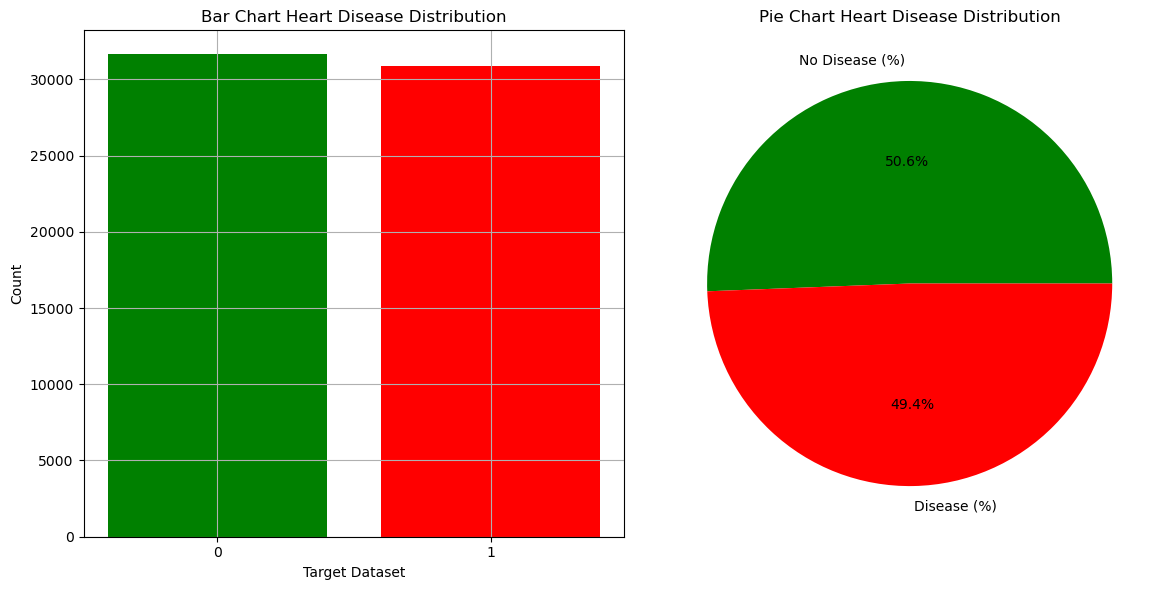

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart in the first subplot
axs[0].bar(df['disease'].unique(), df['disease'].value_counts(), color=['green', 'red'])
axs[0].set_xticks([0, 1])
axs[0].set_xlabel('Target Dataset')
axs[0].set_ylabel('Count')
axs[0].set_title('Bar Chart Heart Disease Distribution')
axs[0].grid(True)

# Pie chart in the second subplot
axs[1].pie(df['disease'].value_counts(), labels=['No Disease (%)', 'Disease (%)'], colors=['green', 'red'], autopct='%1.1f%%')
axs[1].set_title('Pie Chart Heart Disease Distribution')

# Print statements
print("Patients with no heart disease:", df['disease'].value_counts().iloc[0])
print("Patients with heart disease:", df['disease'].value_counts().iloc[1])

# Show the plot
plt.tight_layout()
plt.show()

### Dataset Visualization


<Axes: >

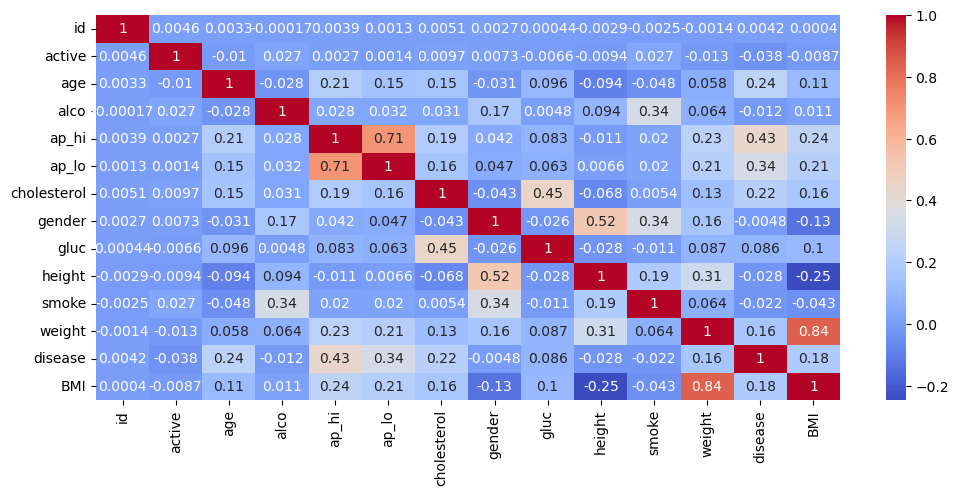

In [21]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

comment:

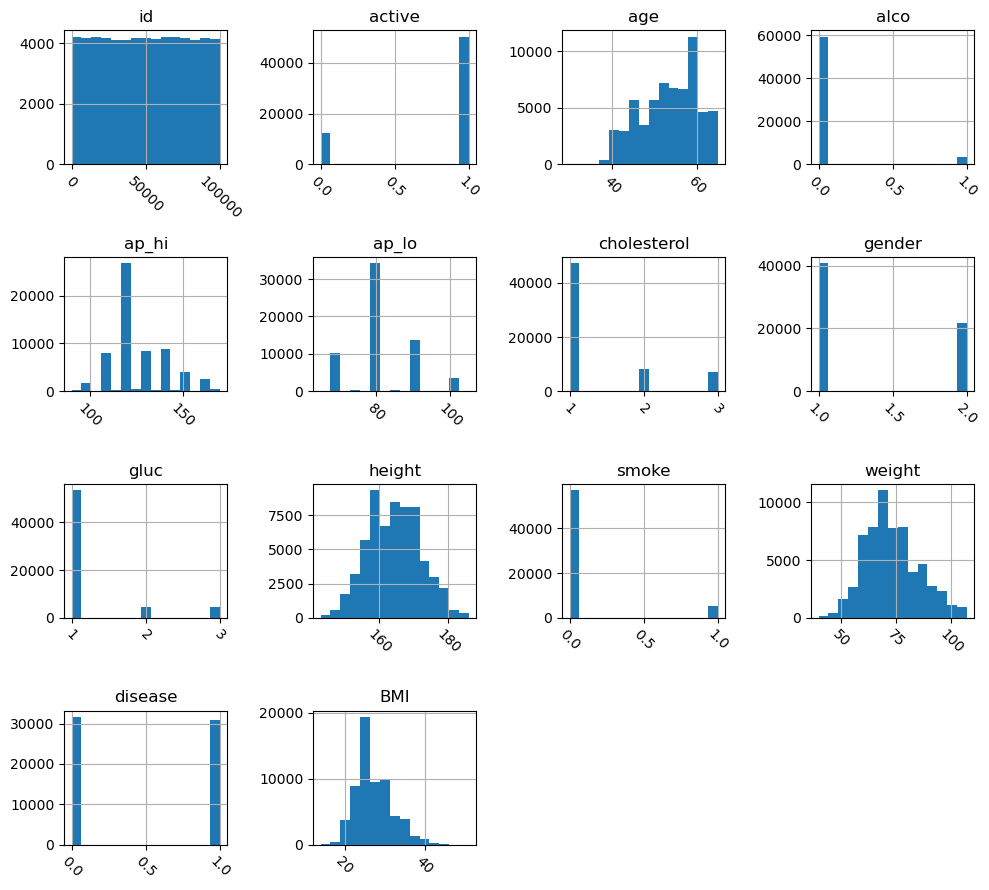

In [22]:
df.hist(figsize=(10,9), xrot=-45, bins=15)
plt.tight_layout()
plt.show()

We could now see from the above distribution that there seems to be no outliers that would affect our analysis, hence we could proceed with our data processing and machine learning phase.

---

### Data processing

In [23]:
features = df[["age", "gender", "weight", "height", "ap_hi", "ap_lo" , "active", "alco" , "cholesterol", "gluc", "smoke", "BMI"]]
label = df["disease"]

Epoch 1/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7152 - loss: 0.5675 - val_accuracy: 0.7236 - val_loss: 0.5547
Epoch 2/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.7295 - loss: 0.5489 - val_accuracy: 0.7255 - val_loss: 0.5511
Epoch 3/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.7267 - loss: 0.5507 - val_accuracy: 0.7267 - val_loss: 0.5526
Epoch 4/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.7267 - loss: 0.5498 - val_accuracy: 0.7255 - val_loss: 0.5521
Epoch 5/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.7288 - loss: 0.5491 - val_accuracy: 0.7282 - val_loss: 0.5513
Epoch 6/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.7336 - loss: 0.5437 - val_accuracy: 0.7259 - val_loss: 0.5529
Epoch 7/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7325 - loss: 0.5448 - val_accuracy: 0.7241 - val_loss: 0.5549
Epoch 8/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accu

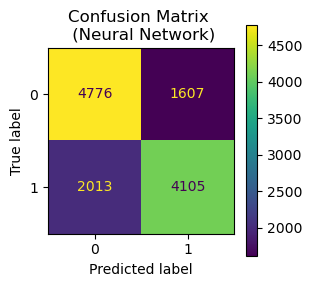

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with epochs
epochs = 1000
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Performance metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Neural Network Classification Report")
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_mtx, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('Confusion Matrix \n (Neural Network)')
cmd.plot(ax=ax)
plt.show()

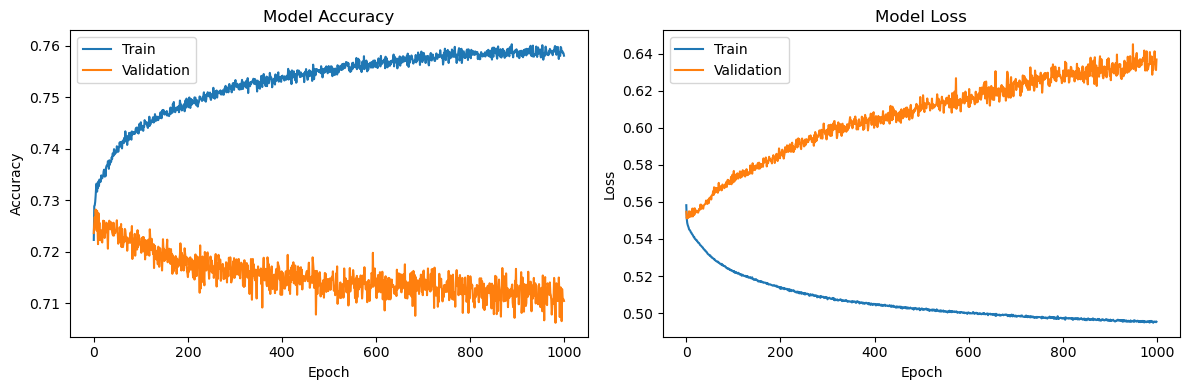

In [25]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Epoch 1/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - accuracy: 0.6605 - loss: 0.6323 - val_accuracy: 0.7256 - val_loss: 0.5606
Epoch 2/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.7209 - loss: 0.5738 - val_accuracy: 0.7259 - val_loss: 0.5553
Epoch 3/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.7208 - loss: 0.5700 - val_accuracy: 0.7270 - val_loss: 0.5541
Epoch 4/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.7244 - loss: 0.5679 - val_accuracy: 0.7256 - val_loss: 0.5541
Epoch 5/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7266 - loss: 0.5620 - val_accuracy: 0.7247 - val_loss: 0.5554
Epoch 6/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7268 - loss: 0.5630 - val_accuracy: 0.7259 - val_loss: 0.5530
Epoch 7/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.7231 - loss: 0.5661 - val_accuracy: 0.7268 - val_loss: 0.5517
Epoch 8/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - ac

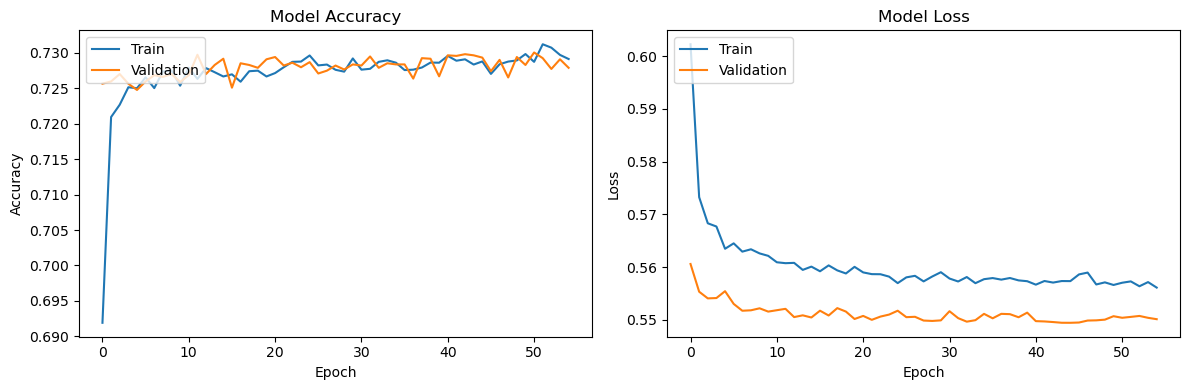

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Define the neural network model with dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with epochs and early stopping
epochs = 1000
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6313
           1       0.70      0.70      0.70      6188

    accuracy                           0.70     12501
   macro avg       0.70      0.70      0.70     12501
weighted avg       0.70      0.70      0.70     12501



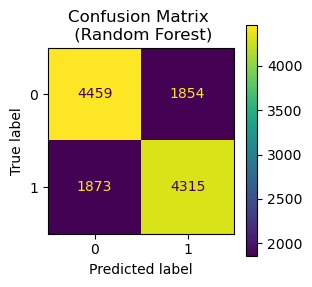

In [27]:
# Split the Data
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, label, test_size=0.2)

# Initialize and train the machine learning model
RF = RandomForestClassifier()
RF_model = RF.fit(X_train1,y_train1)

# Predictions:
y_pred1 = RF_model.predict(X_test1)
#print(y_pred1)

# Predict Test set Proba results
y_proba1 = RF_model.predict_proba(X_test1)[:,1]
#print(y_proba1)

# Performance:
#print('Accuracy is', round(accuracy_score(y_test,y_pred),3))
#print("\n")

# Display Classification Report
print("\n")
print("Random Forest Classification Report")
RF_classification_report = classification_report(y_test1,y_pred1)
print(RF_classification_report)

# Save the accuracy, precision, recall and f1_scores.
accuracy_score_RF = round(accuracy_score(y_test1, y_pred1), 4)*100
precision_score_RF = round(precision_score(y_test1, y_pred1), 4)*100
recall_score_RF = round(recall_score(y_test1, y_pred1), 4)*100
f1_score_RF = round(f1_score(y_test1, y_pred1), 4)*100

# Confusion Matrix
random_forest_confusion_matrix = confusion_matrix(y_test1, y_pred1)
cmd_RF=ConfusionMatrixDisplay(random_forest_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (Random Forest)')
cmd_RF.plot(ax=ax)

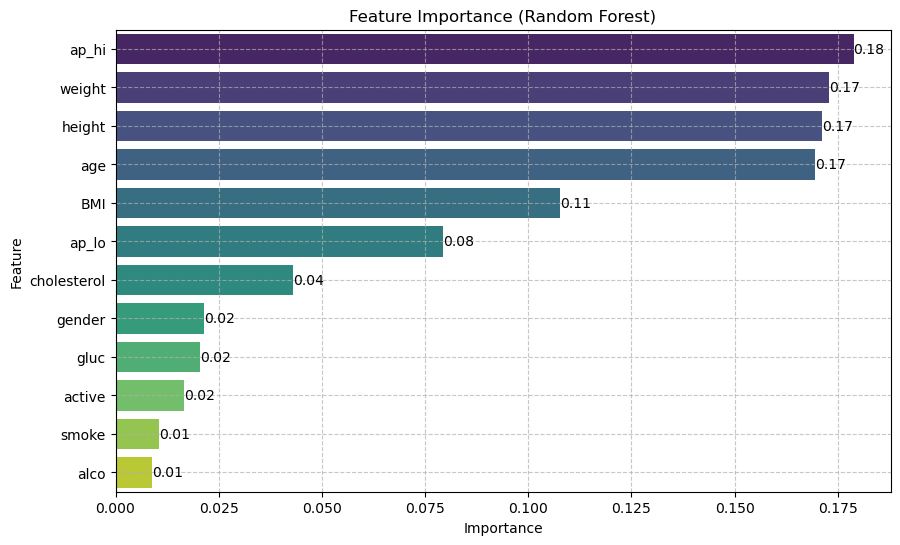

In [28]:
feature_importances = pd.Series(RF_model.feature_importances_, index=features.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels
for index, value in enumerate(feature_importances):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()



K Nearest Neigbour Classification Report
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6307
           1       0.72      0.66      0.69      6194

    accuracy                           0.70     12501
   macro avg       0.70      0.70      0.70     12501
weighted avg       0.70      0.70      0.70     12501



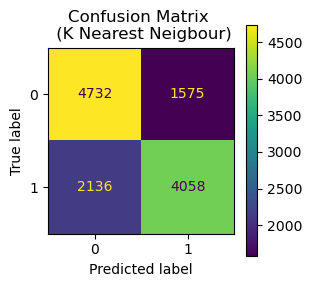

In [29]:
# Splitting the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, label, test_size = 0.2, random_state=3444)

# Training the KNN classifier
KNN = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
KNN_model = KNN.fit(X_train2, y_train2)

# Predicting on the test set
y_pred2 = KNN.predict(X_test2)

# Predict Test set Proba results
y_proba2 = KNN_model.predict_proba(X_test2)[:,1]
#print(y_proba2)

# Display Classification Report
print("\n")
print("K Nearest Neigbour Classification Report")
KNN_classification_report = classification_report(y_test2,y_pred2)
print(KNN_classification_report)

# Save the accuracy, precision, recall and f1_scores.
accuracy_score_KNN = round(accuracy_score(y_test2, y_pred2), 4)*100
precision_score_KNN = round(precision_score(y_test2, y_pred2), 4)*100
recall_score_KNN = round(recall_score(y_test2, y_pred2), 4)*100
f1_score_KNN = round(f1_score(y_test2, y_pred2), 4)*100

# Confusion Matrix
k_nearest_neigbour_confusion_matrix = confusion_matrix(y_test2, y_pred2)
cmd_KNN=ConfusionMatrixDisplay(k_nearest_neigbour_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (K Nearest Neigbour)')
cmd_KNN.plot(ax=ax)

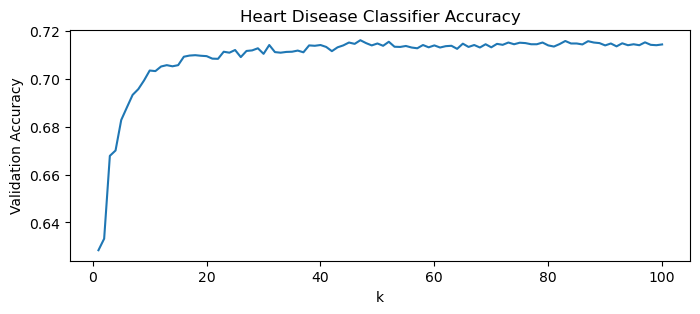

In [39]:
accuracies = []
for k in range(1,101):
    KNN= KNeighborsClassifier(n_neighbors = k)         # n_neighbors = k
    KNN.fit(X_train2, y_train2)
    #print(KNN.score(X_test2,y_test2))
    accuracies.append(KNN.score(X_test2,y_test2))

k_list = [i for i in range(1,101)]
#print(k_list)

fig = plt.figure(figsize=(8,3))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Heart Disease Classifier Accuracy")
plt.show()

The image shows the performance of a k-Nearest Neighbors (k-NN) classifier for predicting heart disease presence. :

### **Graph Interpretation:**
- **Title:** "Heart Disease Classifier Accuracy"
- **X-axis:** Represents the number of neighbors 'k'.
- **Y-axis:** Represents the validation accuracy.
- **Trend:** The validation accuracy increases sharply as 'k' increases from 1 to around 20, then plateaus with minor fluctuations up to 'k' = 100.

### **Code Explanation:**
- **k-Nearest Neighbors (k-NN):** The code trains a k-NN classifier with different values of 'k' (from 1 to 100) and records the validation accuracy for each 'k'.
- **Loop:** For each 'k', the classifier is trained, and its accuracy on the validation set is appended to a list.

### **Insights:**
- **Optimal 'k':** The model's accuracy stabilizes around 'k' = 20, suggesting this might be an optimal choice for 'k'.
- **Performance:** The model achieves a maximum validation accuracy of around 0.72.





Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6307
           1       0.75      0.66      0.70      6194

    accuracy                           0.72     12501
   macro avg       0.73      0.72      0.72     12501
weighted avg       0.73      0.72      0.72     12501



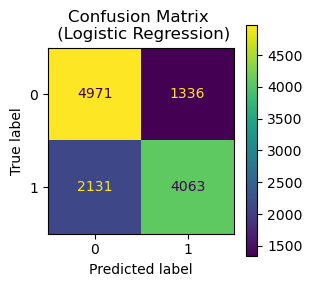

In [31]:
# Perform train, test, split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 3444)

# Normalize the Data : scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(pd.DataFrame(X_train, columns=initial_df.columns[:-1]))

# Create and train the model
LR = LogisticRegression(max_iter = 100)
LR_model = LR.fit(X_train, y_train)

# Analyze the coefficients (which feature is most important in predicting)
#print(LR.coef_)

# Predictions:
y_pred = LR_model.predict(X_test)
#print(y_pred)

# Predict Test set Proba results
y_proba = LR_model.predict_proba(X_test)[:,1]
#print(y_proba)

# Display Classification Report
print("\n")
print("Logistic Regression Classification Report")
LR_classification_report = classification_report(y_test,y_pred)
print(LR_classification_report)

# Save the accuracy, precision, recall and f1_scores.
accuracy_score_LR = round(accuracy_score(y_test, y_pred), 4)*100
precision_score_LR = round(precision_score(y_test, y_pred), 4)*100
recall_score_LR = round(recall_score(y_test, y_pred), 4)*100
f1_score_LR = round(f1_score(y_test, y_pred), 4)*100

# Confusion Matrix
logistic_regression_confusion_matrix = confusion_matrix(y_test, y_pred)
cmd_LR=ConfusionMatrixDisplay(logistic_regression_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (Logistic Regression)')
cmd_LR.plot(ax=ax)

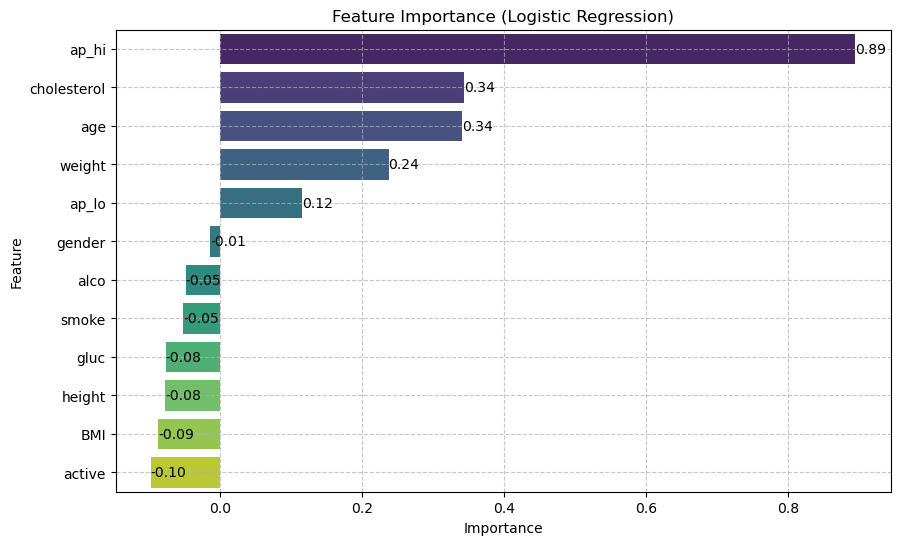

In [32]:
feature_importances = pd.Series(LR_model.coef_[0], index=features.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels
for index, value in enumerate(feature_importances):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

In [33]:
compare_df = pd.DataFrame({"Actual_Output": y_test, 
                           "Predicted_Output": y_pred,
                            "Predict_Proba": y_proba})
#compare_df.sort_values(by=['Predict_Proba'], inplace=True, ascending=False)                    #sort data function
compare_df[:5]

,Actual_Output,Predicted_Output,Predict_Proba
67290,0,0,0.416343
25223,0,0,0.132466
9120,0,1,0.551251
69262,0,0,0.303408
13833,1,0,0.387442


In [34]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Actual_Output'] != compare_df['Predicted_Output']


df_missed = compare_df[compared_bool]
df_missed.sort_values(by=['Actual_Output', 'Predict_Proba'], inplace=True, ascending=False) 
df_missed.loc[(df_missed['Actual_Output']==1)]

,Actual_Output,Predicted_Output,Predict_Proba
53090,1,0,0.499823
43871,1,0,0.499431
26485,1,0,0.499026
47084,1,0,0.498771
63556,1,0,0.498654
...,...,...,...
37819,1,0,0.058069
15119,1,0,0.054202
107,1,0,0.052301
19364,1,0,0.044596


In [35]:
compare_score = pd.DataFrame()
compare_score=compare_score.reset_index(drop=True)

compare_score[' '] = ["Accuracy", "Precision", "Recall", "F1 score"]
compare_score.set_index(' ')
compare_score['Logistic Regression'] = accuracy_score_LR, precision_score_LR, recall_score_LR, f1_score_LR
compare_score['Random Forest'] = [accuracy_score_RF, precision_score_RF, recall_score_RF, f1_score_RF]
compare_score['K Nearest Neigbour'] = [accuracy_score_KNN, precision_score_KNN, recall_score_KNN, f1_score_KNN]

compare_score

,,Logistic Regression,Random Forest,K Nearest Neigbour
0,Accuracy,72.27,70.19,70.31
1,Precision,75.25,69.95,72.04
2,Recall,65.60,69.73,65.52
3,F1 score,70.09,69.84,68.62


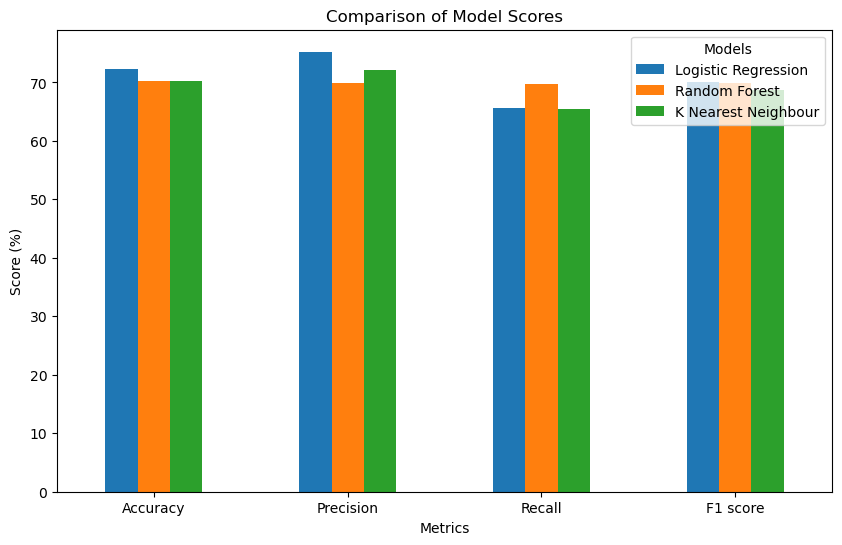

In [36]:
# Create the DataFrame
compare_score = pd.DataFrame({
    ' ': ["Accuracy", "Precision", "Recall", "F1 score"],
    'Logistic Regression': [accuracy_score_LR, precision_score_LR, recall_score_LR, f1_score_LR],
    'Random Forest': [accuracy_score_RF, precision_score_RF, recall_score_RF, f1_score_RF],
    'K Nearest Neighbour': [accuracy_score_KNN, precision_score_KNN, recall_score_KNN, f1_score_KNN]
})

# Set the index
compare_score.set_index(' ', inplace=True)

# Plot the bar chart
compare_score.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Scores')
plt.ylabel('Score (%)')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Models')

plt.show()

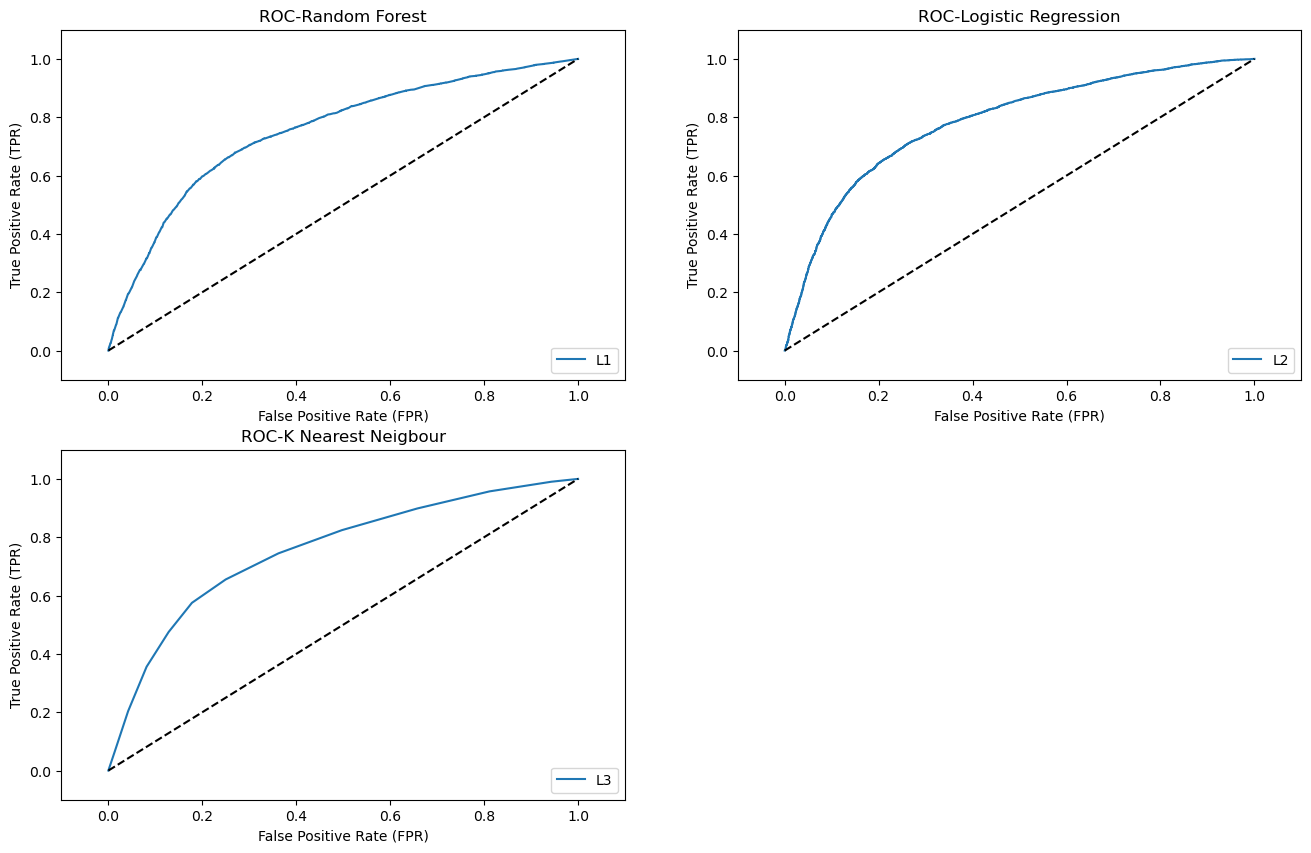

In [37]:
# instantiating the roc_cruve
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_proba1)     # Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_proba)          # Logistic Regression
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_proba2)          # Logistic Regression

fig = plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(fpr1, tpr1, label='L1')     # Plot ROC curve
plt.legend(loc='lower right')        # Position of legend
plt.plot([0,1],[0,1],'k--')          # Diagonal 45 degree line
plt.title('ROC-Random Forest')
plt.xlim([-0.1,1.1])                 # Axes limits and labels
plt.ylim([-0.1,1.1])

plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.subplot(2,2,2)
plt.plot(fpr, tpr, label='L2')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
#plt.plot([0, 1], [0, 1], color = 'g')
plt.title('ROC-Logistic Regression')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.subplot(2,2,3)
plt.plot(fpr2, tpr2, label='L3')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
#plt.plot([0, 1], [0, 1], color = 'g')
plt.title('ROC-K Nearest Neigbour')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

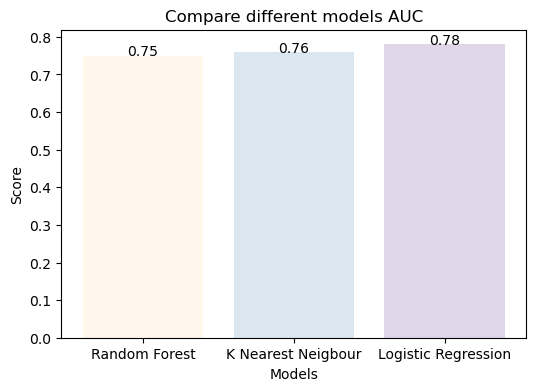

In [38]:
RF_AUC = round(roc_auc_score(y_test1, y_proba1), 2)
KNN_AUC = round(roc_auc_score(y_test2, y_proba2), 2)
LR_AUC = round(roc_auc_score(y_test, y_proba), 2)

plt.figure(figsize=(6,4))
plt.bar("Random Forest", RF_AUC , color=["blanchedalmond"], alpha = 0.40)
plt.bar("K Nearest Neigbour", KNN_AUC , color=["steelblue"], alpha = 0.20)
plt.bar("Logistic Regression", LR_AUC , color=["rebeccapurple"], alpha = 0.20)

plt.text("Random Forest", RF_AUC, RF_AUC, ha = 'center')
plt.text("K Nearest Neigbour", KNN_AUC, KNN_AUC, ha = 'center')
plt.text("Logistic Regression", LR_AUC, LR_AUC, ha = 'center')

plt.title("Compare different models AUC")
plt.xlabel("Models")
plt.ylabel('Score')
plt.show()

In [40]:
#"age", "gender", "weight", "height", "ap_hi", "ap_lo" , "active", "alco" , "cholesterol", "gluc", "smoke", "BMI"

Jack = np.array([50, 1, 74, 166, 170, 80, 0, 1, 3, 1, 1, 26.8])       #Heart Profile Test
Jack = Jack.reshape(1, -1)

    # Scale sample person features
Jack_scaled = scaler.transform(Jack)

    # Make predictions!
y_pred_jack = LR_model.predict(Jack_scaled)
y_pred1_jack = RF_model.predict(Jack)
y_pred2_jack = KNN_model.predict(Jack)
print("Logistic Regression model predict: ", y_pred_jack)
print("Random Forest model predict:       ", y_pred1_jack)
print("K Nearest Neigbour model predict:  ", y_pred2_jack)

print("                                                   ***[0] Without Heart Disease")
print("                                                      [1] With Heart Disease")

Logistic Regression model predict:  [1]
Random Forest model predict:        [1]
K Nearest Neigbour model predict:   [1]
                                                   ***[0] Without Heart Disease
                                                      [1] With Heart Disease
